# 商务案例: 社会网络分析
# 1. 图论基础

### 相关包的导入
- networkx 官方文档: https://networkx.github.io/documentation/stable/

In [1]:
import networkx as nx
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. 生成网络

1. 图:
    - 无向图: Graph
    - 有向图: DiGraph
<br />
<br />
2. 节点:
    - 添加一个节点: add_node(1)
    - 添加多个节点: add_nodes_from([2, 3])
<br />
<br />
3. 边:
    - 添加一条边: add_edge(2, 3)
    - 添加多条边: add_edges_from([(2, 3), (3, 4)])

### 生成无向图

In [2]:
# 创建一个空的无向图G
G = nx.Graph()

# 向G中添加节点
G.add_node(1)

# 添加一条边（隐含地添加了两个节点2和3）
G.add_edge(2, 3)
# 在无向图中边2-3与边3-2被认为相同
G.add_edge(3, 2)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
print("All edges: {}".format(G.edges()))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3)]
Number of edges: 1


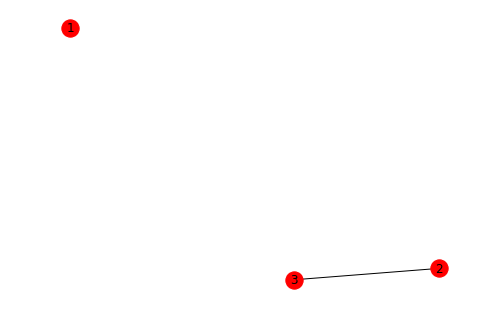

In [3]:
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

### 生成有向图

In [4]:
# 创建一个空的有向图G
G = nx.DiGraph()

# 向G中添加节点
G.add_node(1)

# 添加一条边（隐含地添加了两个节点2和3）
G.add_edge(2, 3)
# 在有向图中边2-3与边3-2被认为不相同
G.add_edge(3, 2)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
# 观察与无向图中结果的不同之处
print("All edges: {}".format(G.edges()))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3), (3, 2)]
Number of edges: 2


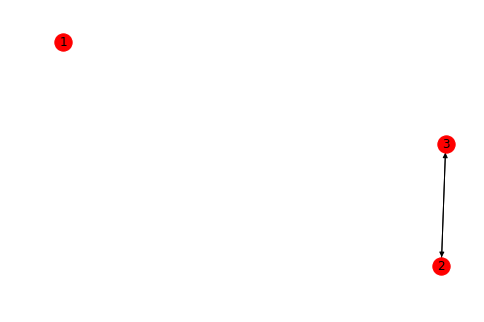

In [5]:
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

### 生成加权图

In [6]:
# 创建一个空的无向图G (或有向图)
G = nx.Graph()

# 向G中添加节点
G.add_node(1)

# 添加一条带有权重的边
G.add_edge(2, 3, weight=3)
G.add_edge(2, 1, weight=5)
G.add_edge(3, 5, weight=1)
G.add_edge(1, 4, weight=3)
G.add_edge(2, 5, weight=6)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
print("All edges: {}".format(G.edges()))
print("All edges data: {}".format(G.edges(data=True)))

# 查看边的权重
print("Data of edge 2-3: {}".format(G.get_edge_data(2, 3)))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3, 5, 4]
All edges: [(1, 2), (1, 4), (2, 3), (2, 5), (3, 5)]
All edges data: [(1, 2, {'weight': 5}), (1, 4, {'weight': 3}), (2, 3, {'weight': 3}), (2, 5, {'weight': 6}), (3, 5, {'weight': 1})]
Data of edge 2-3: {'weight': 3}
Number of edges: 5


{(1, 2): Text(0.117158,-0.0616956,'5'),
 (1, 4): Text(0.701017,-0.453081,'3'),
 (2, 3): Text(-0.51798,0.14372,'3'),
 (2, 5): Text(-0.266896,0.374707,'6'),
 (3, 5): Text(-0.617158,0.387735,'1')}

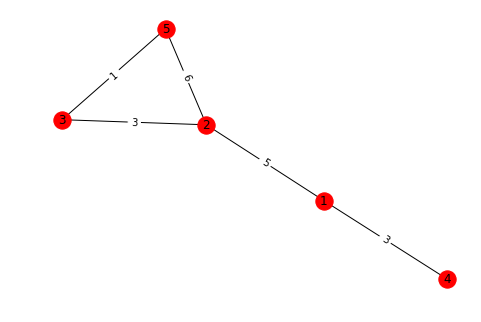

In [7]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

In [8]:
nx.adj_matrix(G).todense()

matrix([[0, 5, 0, 0, 3],
        [5, 0, 3, 6, 0],
        [0, 3, 0, 1, 0],
        [0, 6, 1, 0, 0],
        [3, 0, 0, 0, 0]], dtype=int32)

In [9]:
np.array([[0, 5, 0, 0, 3],
          [5, 0, 3, 6, 0],
          [0, 3, 0, 1, 0],
          [0, 6, 1, 0, 0],
          [3, 0, 0, 0, 0]])

array([[0, 5, 0, 0, 3],
       [5, 0, 3, 6, 0],
       [0, 3, 0, 1, 0],
       [0, 6, 1, 0, 0],
       [3, 0, 0, 0, 0]])

### 根据邻接矩阵生成网络

All nodes: [0, 1, 2, 3, 4]
All edges: [(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)]
Number of edges: 6


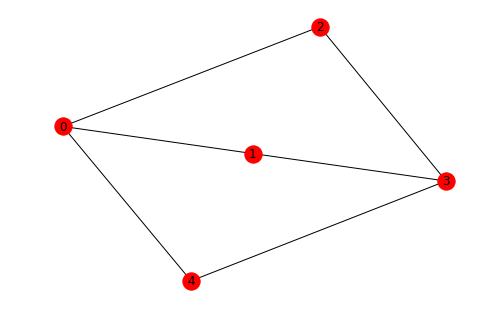

In [10]:
adj_matrix = np.array([[0, 1, 1, 0, 1],
                       [1, 0, 0, 1, 0],
                       [1, 0, 0, 1, 0],
                       [0, 1, 1, 0, 1],
                       [1, 0, 0, 1, 0]])


G = nx.Graph(adj_matrix)

print("All nodes: {}".format(G.nodes()))
print("All edges: {}".format(G.edges()))
print("Number of edges: {}".format(G.number_of_edges()))

nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

In [11]:
new_list = list(range(1, len(list(G.nodes())) + 1))

In [12]:
new_list

[1, 2, 3, 4, 5]

In [13]:
mapping = dict(zip((G.nodes()), new_list))

In [14]:
mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [15]:
# mapping: 旧的索引与新的索引的映射字典

G_new = nx.relabel_nodes(G, mapping=mapping)

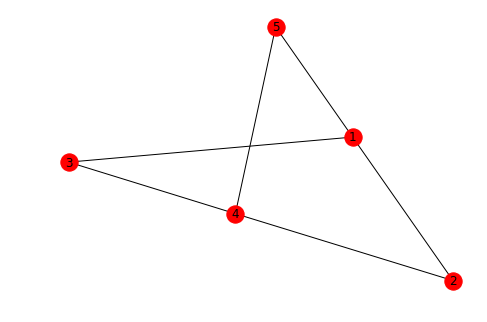

In [16]:
nx.draw(G_new, pos=nx.spring_layout(G_new), with_labels=True)

### 根据边列表生成网络

In [17]:
edge_list = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)]
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from(edge_list)
print("All nodes: {}".format(G.nodes()))
print("All edges: {}".format(G.edges()))
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [0, 1, 2, 3, 4]
All edges: [(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)]
Number of edges: 6


## 1.2. 获取网络的邻接矩阵

In [18]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [19]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 4), (1, 3), (2, 3), (3, 4)])

- nx.adj_matrix(G): 以稀疏矩阵的形式返回网络对应的邻接矩阵

In [20]:
nx.adj_matrix(G)

<5x5 sparse matrix of type '<class 'numpy.intc'>'
	with 12 stored elements in Compressed Sparse Row format>

In [21]:
print(nx.adj_matrix(G))

  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (2, 0)	1
  (2, 3)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (4, 0)	1
  (4, 3)	1


In [22]:
# 转化为稠密矩阵
print(nx.adj_matrix(G).todense())

[[0 1 1 0 1]
 [1 0 0 1 0]
 [1 0 0 1 0]
 [0 1 1 0 1]
 [1 0 0 1 0]]


## 1.3. 获取节点的邻居

- nx.neighbors(G, 0)
- G.neighbors(0)

In [23]:
# 返回的是一个迭代器
nx.neighbors(G, 0)

In [24]:
G.neighbors(0)

In [25]:
list(G.neighbors(0))

[1, 2, 4]

In [26]:
for neighbor in G.neighbors(0):
    print(neighbor)

1
2
4


# 2. 社群识别

## 群组发现算法（Community Detection）

### KCG网络数据集导入与真实群组划分可视化

In [29]:
from collections import defaultdict
from matplotlib import cm

# 导入示例数据集
kcg = nx.karate_club_graph()

pos = nx.spring_layout(kcg)

# 节点所属 community 的 ground truth
gt_dict = nx.get_node_attributes(kcg, 'club')
gt = [gt_dict[i] for i in kcg.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

y_true = gt

# 获取节点度信息用于可视化
d = dict(nx.degree(kcg))

# graph 基本信息
print(nx.info(kcg))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [39]:
# 绘制真实的社群分布图
def draw_communities(Graph, membership, pos, d):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    size_dict = defaultdict(list)
    club_dict = defaultdict(list)
    for stu, club in enumerate(membership):
        club_dict[club].append(stu)
        size_dict[club].append(d[stu]*200)
    
    color_dict = {0: 'red',
                  1: 'green'}
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(Graph, pos,
                               nodelist=members,
                               # node_color=cm.jet(norm(club)),
                               node_color=color_dict[club],
                               node_size=size_dict[club],
                               alpha=0.8,
                               )
    plt.title("Zachary's Karate Club - Communities", fontsize=16)
    nx.draw_networkx_edges(Graph, pos, alpha=0.5)
    nx.draw_networkx_labels(Graph, pos)

In [32]:
# 对比社区发现结果与真实结果的绘图函数
def draw_true_vs_pred(G, y_true, y_pred, pos, algo_name, ax):
    
    for student, club in enumerate(y_true):
        if y_pred is not None:
            if club == y_pred[student]:
                node_color = [0, 1, 0]
                node_shape = 'o'
            else:
                node_color = [0, 0, 0]
                node_shape = 'X'
                
        nx.draw_networkx_nodes(G, pos,
                               nodelist=[student],
                               node_color=node_color,
                               node_size=500,
                               alpha=0.7,
                               ax=ax,
                               node_shape=node_shape)
    
    # Draw edges and show final plot
    ax.set_title(algo_name)
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos)

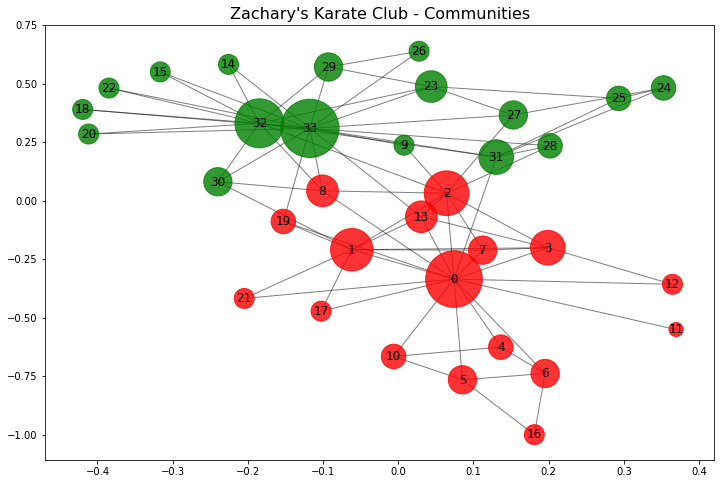

In [40]:
draw_communities(kcg, y_true, pos, d)

### Girvan-Newman算法

- **根据图的边介数中心性(Edge Betweenness Centrality,EBC)值，迭代地移除图中的边来发现图中的社区，边介数中心性最大的边最先被移除**
- **使用方法：girvan_newman(Graph, most_valuable_edge=None)**
- **参考文档：**https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html

In [33]:
from networkx.algorithms.community import girvan_newman

# 使用 Girvan-Newman算法进行社区划分
print("Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)")

communities_generator = girvan_newman(kcg)

i = 0
for c in next(communities_generator):
    i += 1    
    print("Community {}: {}, node num: {}".format(i, c, len(c)))

Using girvan_newman algorithm: girvan_newman(G, most_valuable_edge=None)
Community 1: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, node num: 15
Community 2: {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, node num: 19


In [34]:
community1 = [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
community2 = [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

y_pred_GN = []
for i in range(34):
    if i in community1:
        y_pred_GN.append(0)
    else:
        y_pred_GN.append(1)

y_pred_GN = np.array(y_pred_GN)

In [35]:
print("y_pred_GN: {}".format(y_pred_GN))
print("y_true: {}".format(y_true))

y_pred_GN: [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
y_true: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5,1,'Comparing Girvan Newman result with original communities')

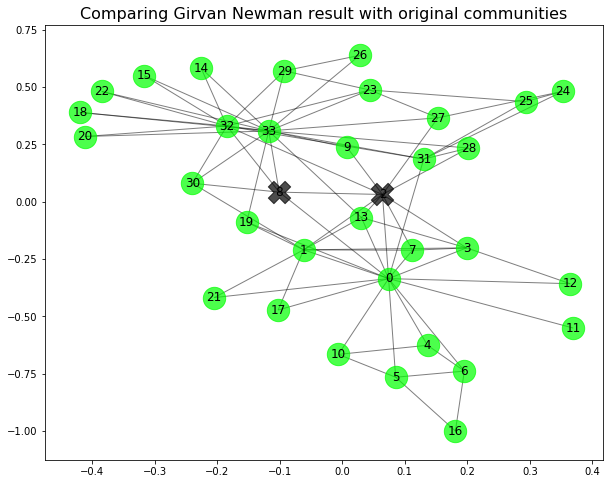

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))

draw_true_vs_pred(kcg, y_true, y_pred_GN, pos, 'Girvan-Newman', ax)

plt.title("Comparing Girvan Newman result with original communities", fontsize=16)

## 切割 - Cut

- 切割：一个切割将图中节点划分为两个集合。切割大小指的是连接两个节点集合之间的边的权重之和。
- nx.cut_size(G, S, T, weight=None): 寻找两部分节点集合（分别为S与T）的切割大小。
- nx.normalized_cut_size(G, S, T, weight=None)：节点集合S与T切割的标准化大小。

In [41]:
community1

[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]

In [42]:
community2

[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

In [43]:
S = set(community1)
T = set(community2)
nx.cut_size(kcg, S, T)

10

In [44]:
nx.normalized_cut_size(kcg, S, T)

0.26262626262626265

# 3. 影响力度量

- Networkx包中心性计算参考链接：https://networkx.org/documentation/stable/reference/algorithms/centrality.html

1. <b>度中心性（Degree centrality）：</b>
    - 一个顶点的度中心性指的是与该顶点关联的其他顶点个数。通常来说，度中心性越大的顶点其重要性越大。在有向图中，度中心性可分为出度中心性，与入度中心性。
<br />
<br />
2. <b>中介中心性（Betweenness centrality）</b>
    - 中介中心性衡量了一个顶点出现在其他任意两个顶点对之间的最短路径的次数，也就是说，如果一个顶点出现在任意两个顶点间最短路径的次数越多，那么该顶点的介数中心性就越大，主要用于衡量一个顶点在图或网络中承担“桥梁”角色的程度。
<br />
<br />
3. <b>接近中心性（Closeness centrality）</b>
    - 接近中心性即一个顶点到其他所有顶点的最短距离之和的倒数。如果一个顶点到其他顶点的最短距离都很小，那么它的接近中心性就较高。相比介数中心性，接近中心性更接近几何上的中心位置。
<br />
<br />
4. <b>特征向量中心性（Eigenvector centrality）</b>
    - 特征向量中心性的基本思想是，一个节点的中心性是相邻节点中心性的函数。也就是说，与你连接的人越重要，你也就越重要。度中心性高的顶点特征向量中心性不一定高，因为所有的连接者有可能特征向量中心性很低；同理，特征向量中心性高并不意味着它的度中心性高。
<br />
<br />
5. <b>Katz中心性（Katz centrality）</b>
    - Katz 中心性基于其邻居的中心性计算节点的中心性，它是特征向量中心性的推广。Katz中心性通过测量直接邻居的数量以及网络中通过这些直接邻居连接到考虑中的节点的所有其他节点的数量来计算网络中节点的相对影响。
<br />
<br />

## 度中心性计算（仍使用上面的KCG网络为例）

 - nx.degree_centrality(G)：返回节点为键，度中心性为值的字典

In [46]:
nx.degree_centrality(kcg)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

## 中介中心性计算

- nx.betweenness_centrality(G)：返回节点为键，介数中心性为值的字典

In [48]:
nx.betweenness_centrality(kcg)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

## 接近中心性计算

- nx.closeness_centrality(G)：返回节点为键，接近中心性为值的字典

In [50]:
nx.closeness_centrality(kcg)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

## 特征向量中心性计算

- nx.eigenvector_centrality(G)：返回节点为键，特征向量中心性为值的字典

In [51]:
nx.eigenvector_centrality(kcg)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.31718938996844476,
 3: 0.2111740783205706,
 4: 0.07596645881657382,
 5: 0.07948057788594247,
 6: 0.07948057788594247,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637758,
 10: 0.07596645881657381,
 11: 0.05285416945233648,
 12: 0.08425192086558088,
 13: 0.22646969838808148,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.023634794260596875,
 17: 0.09239675666845953,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.09239675666845953,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.05705373563802805,
 25: 0.05920820250279008,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.19103626979791702,
 32: 0.3086510477336959,
 33: 0.373371213013235}

## Katz 中心性计算

- nx.katz_centrality(G)：返回节点为键，Katz中心性为值的字典

In [52]:
nx.katz_centrality(kcg)

{0: 0.3213245969592325,
 1: 0.2354842531944946,
 2: 0.2657658848154288,
 3: 0.1949132024917254,
 4: 0.12190440564948413,
 5: 0.1309722793286492,
 6: 0.1309722793286492,
 7: 0.166233052026894,
 8: 0.2007178109661081,
 9: 0.12420150029869696,
 10: 0.12190440564948413,
 11: 0.09661674181730141,
 12: 0.11610805572826272,
 13: 0.19937368057318847,
 14: 0.12513342642033795,
 15: 0.12513342642033795,
 16: 0.09067874388549631,
 17: 0.12016515915440099,
 18: 0.12513342642033795,
 19: 0.15330578770069542,
 20: 0.12513342642033795,
 21: 0.12016515915440099,
 22: 0.12513342642033795,
 23: 0.16679064809871574,
 24: 0.11021106930146936,
 25: 0.11156461274962841,
 26: 0.11293552094158042,
 27: 0.1519016658208186,
 28: 0.143581654735333,
 29: 0.15310603655041516,
 30: 0.16875361802889585,
 31: 0.19380160170200547,
 32: 0.2750851434662392,
 33: 0.3314063975218936}